In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### importing dataset from keras library

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [10]:
#the training data has 6000 samples of (28,28) shape
#each figure is of with 28*28 features
X_train[0].shape

(28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

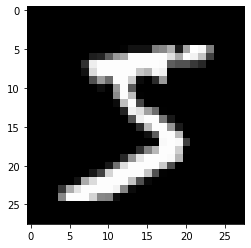

In [8]:
plt.imshow(X_train[0],cmap='gray')

In [12]:
y_train[0]

5

the figure is 5
the figure is 0
the figure is 4
the figure is 1
the figure is 9


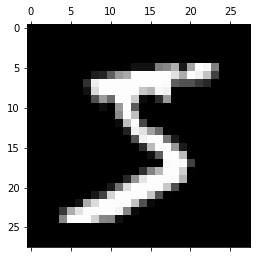

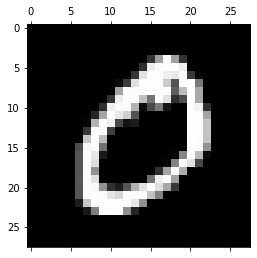

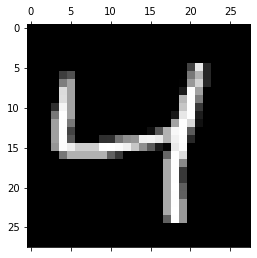

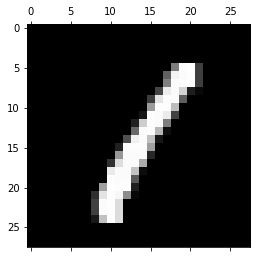

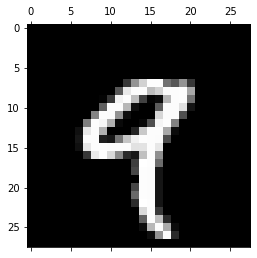

In [18]:
for i in range(5):
    plt.matshow(X_train[i],cmap='gray')
    print('the figure is {}'.format(y_train[i]))

    

In [19]:
len(X_train)

60000

In [24]:
#converting each figure into an single array
#the DL course notation and this notation is different
#In coursera each column represent each figure
#here each row represent each figure
X_train_flattened=X_train.reshape(len(X_train),-1)
X_test_flattened=X_test.reshape(len(X_test),-1)

In [25]:
X_train_flattened.shape

(60000, 784)

In [27]:
X_test_flattened.shape

(10000, 784)

In [39]:
X_train_flattened[0].shape

(784,)

### creating a simple neural network

In [28]:
#no of layers should be defined
#no of units should be defined
#no of layers 1 layer
#no of input units is 784
#Keras.Sequential is a stack of layers of a NN
#each element is layer
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#training the model model.fit
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 998us/step - loss: 9.6525 - accuracy: 0.8403
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0452 - accuracy: 0.8782: 0s - loss: 6.0
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.8508 - accuracy: 0.8814
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.5478 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3456 - accuracy: 0.8877


### scale the values

In [40]:
X_train=X_train/255
X_test=X_test/255

In [42]:
X_train_sflattened=X_train.reshape(len(X_train),-1)
X_test_sflattened=X_test.reshape(len(X_test),-1)

In [43]:
X_test_sflattened.shape

(10000, 784)

In [47]:
model1=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
#compiling the model
model1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
#training the model
model1.fit(X_train_sflattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4721 - accuracy: 0.8776: 0s - loss:
Epoch 2/5
1875/1875 [==============================] - 2s 997us/step - loss: 0.3037 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2827 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9232: 1s - loss:
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9253: 0s


In [48]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.3768 - accuracy: 0.8951


[5.376766681671143, 0.8950999975204468]

In [49]:
model1.evaluate(X_test_sflattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9245


[0.2696418762207031, 0.9244999885559082]

7

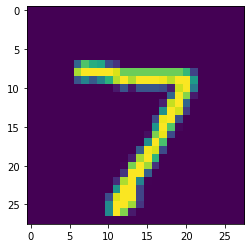

In [54]:
#we are getting 3% more accuracy in using scaling model
plt.imshow(X_test[0])
y_test[0]

In [58]:
y_pred=model.predict(X_test_flattened)
y_pred[0]

array([2.2540556e-33, 0.0000000e+00, 3.3677113e-15, 1.0000000e+00,
       7.6166203e-26, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [59]:
y_test[0]

7

In [61]:
np.argmax(y_pred[0])

3

In [62]:
y_test[1]

2

In [63]:
np.argmax(y_pred[1])

0

In [65]:
for i in range(6):
    print(y_test[i])
    print(np.argmax(y_pred[i]))
    print('-----------')

7
3
-----------
2
0
-----------
1
1
-----------
0
0
-----------
4
4
-----------
1
1
-----------


### similarly for scaled model

In [66]:
y1_pred=model1.predict(X_test_sflattened)

In [68]:
for i in range(6):
    print(y_test[i])
    print(np.argmax(y1_pred[i]))
    print('-----')

7
7
-----
2
2
-----
1
1
-----
0
0
-----
4
4
-----
1
1
-----


### confusion matrix

In [69]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels

[3,
 0,
 1,
 0,
 4,
 1,
 3,
 1,
 0,
 4,
 0,
 2,
 3,
 0,
 1,
 2,
 4,
 2,
 2,
 3,
 3,
 0,
 1,
 0,
 4,
 0,
 3,
 4,
 0,
 1,
 3,
 1,
 2,
 0,
 3,
 0,
 2,
 1,
 0,
 1,
 1,
 3,
 3,
 2,
 2,
 0,
 1,
 1,
 3,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 4,
 0,
 2,
 0,
 4,
 2,
 3,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 3,
 0,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 0,
 2,
 4,
 0,
 1,
 4,
 1,
 2,
 0,
 4,
 1,
 0,
 0,
 2,
 2,
 4,
 0,
 0,
 3,
 4,
 0,
 1,
 0,
 3,
 2,
 1,
 3,
 4,
 2,
 2,
 0,
 0,
 2,
 1,
 3,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 4,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 3,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 3,
 2,
 2,
 4,
 5,
 1,
 3,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 3,
 4,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 3,
 0,
 3,
 0,
 0,
 3,
 1,
 0,
 1,
 4,
 1,
 3,
 0,
 0,
 2,
 2,
 2,
 3,
 2,
 1,
 4,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 1,


In [73]:
print(y_test[:5])

[7 2 1 0 4]


In [75]:
y1_pred_labels=[np.argmax(i) for i in y1_pred]

In [76]:
y1_pred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 8,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [77]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    1,    0,    1,    0,    1,    0,    0,    0],
       [   7, 1128,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 359,  387,  280,    3,    3,    0,    0,    0,    0,    0],
       [ 489,  266,  180,   75,    0,    0,    0,    0,    0,    0],
       [ 167,   76,  257,  214,  268,    0,    0,    0,    0,    0],
       [ 604,   35,  102,   77,   35,   39,    0,    0,    0,    0],
       [ 348,   97,  499,    3,    7,    0,    4,    0,    0,    0],
       [ 139,  104,  228,  506,   29,    3,    0,   19,    0,    0],
       [ 271,  367,  265,   37,   20,   11,    1,    1,    1,    0],
       [ 112,   72,  166,  532,  126,    0,    0,    1,    0,    0]])>

In [79]:
cm1=tf.math.confusion_matrix(labels=y_test,predictions=y1_pred_labels)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    0,    2,    0,    4,   11,    3,    3,    1],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   4,    8,  905,   27,    7,    4,   14,   10,   48,    5],
       [   2,    0,   10,  942,    1,   13,    3,    9,   21,    9],
       [   1,    1,    2,    1,  900,    0,   16,    5,    9,   47],
       [   9,    3,    2,   42,    9,  758,   21,    7,   34,    7],
       [   7,    3,    4,    1,    7,    6,  926,    2,    2,    0],
       [   1,    5,   18,   12,    7,    0,    0,  943,    4,   38],
       [   6,    6,    6,   26,    9,   19,   10,   12,  874,    6],
       [  10,    7,    1,   11,   16,    5,    0,   20,    7,  932]])>

Text(69.0, 0.5, 'Truth')

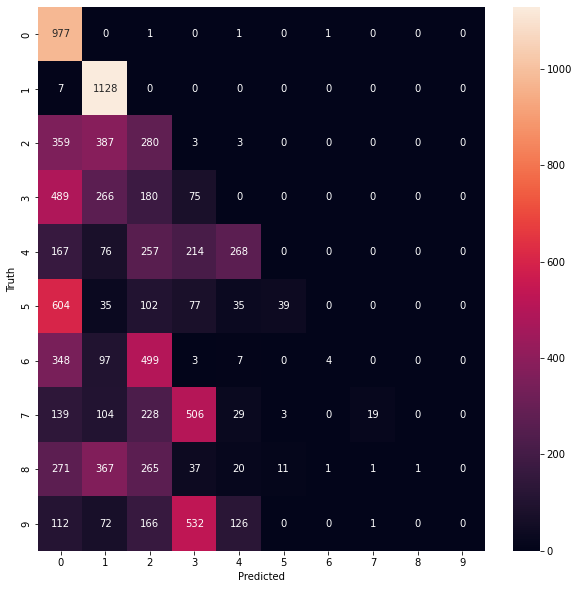

In [81]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

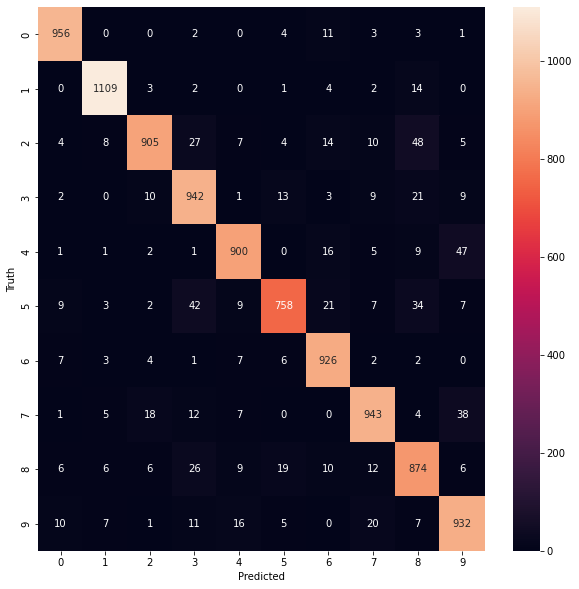

In [82]:

plt.figure(figsize=(10,10))
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')